In [119]:
import numpy as np
import matplotlib.pyplot as plt

In [120]:
def add_skipped(l, n=11):
    return l + [float('nan')] * (n - len(l))
def drop_nan(m):
    return m[~np.isnan(m).any(axis=1)]
def drop_nan_2(m):
    return m[~np.isnan(m)]

In [121]:
p = "nov_24/VID_20241124_154310.txt"
# p = "pV_4-2.txt"
f = open(p, "r")
data = np.array([add_skipped([float('nan') if j == "" else float(j)  for j in i.strip().split("\t")], 5) for i in f.readlines()[3:]])

In [122]:
px_to_cm =  1/np.mean(np.gradient(drop_nan_2(data[:, 3])))

In [142]:
TX = drop_nan(data[:, [0,1]])
T = TX[:, 0]-2.85
X = -TX[:, 1]*px_to_cm
mask = T > 0 
X = 18 + X[mask]
T = T[mask]

In [143]:
from scipy.ndimage import gaussian_filter

In [153]:
sigma=40

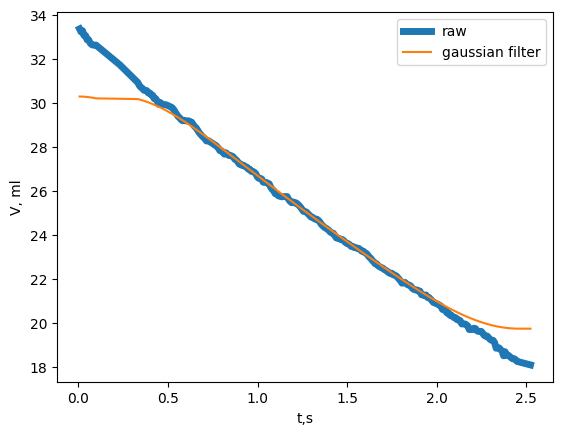

In [154]:
plt.plot(T, X, linewidth=5, label="raw")
plt.plot(T, gaussian_filter(X, sigma=sigma), label="gaussian filter")
plt.xlabel("t,s")
plt.ylabel("V, ml")
plt.legend()

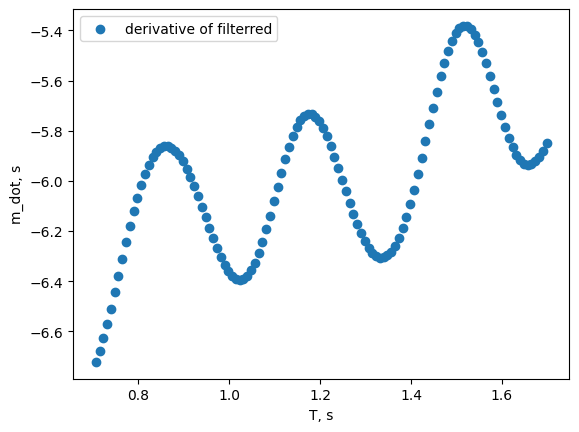

In [150]:
# plt.plot(T_pico, np.gradient(V_pico)/np.gradient(T_pico), label="derivative of raw")

mask = (T > 0.7) & (T < 1.7)
plt.scatter(T[mask], (np.gradient(gaussian_filter(X, sigma=sigma))/np.gradient(T))[mask], label="derivative of filterred")
# plt.plot(T_pico, T_pico*slope + intercept, label="linear fit of derivative of filtered")
# plt.plot(T_pico, b2*T_pico**2 + b1*T_pico + b0, label="derivative of cubic fit of raw")
plt.xlabel("T, s")
plt.ylabel("m_dot, s")
plt.legend()

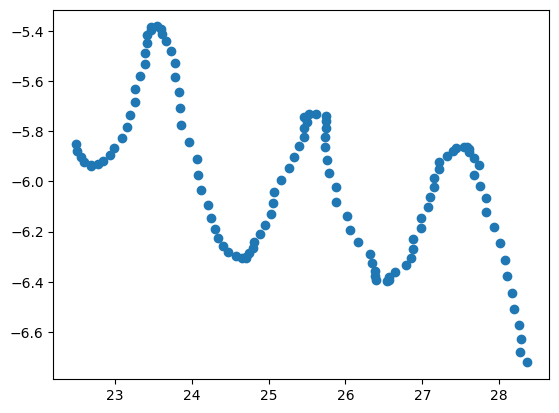

In [151]:
plt.scatter(X[mask], (np.gradient(gaussian_filter(X, sigma=sigma))/np.gradient(T))[mask], label="derivative of filterred")


In [152]:
a5, a4, a3, a2, a1, a0 = np.polyfit(T, X, deg=5)



In [87]:
b4 = a5*5
b3 = a4*4
b2 = a3*3
b1 = a2*2
b0 = a1

In [88]:
# plt.scatter(T, X)
# plt.plot(T, a5*T**5 + a4*T**4 + a3*T**3 + a2*T**2 + a1*T + a0, linewidth=2, label="fit", c="r")

In [89]:
# # plt.plot(T_pico, np.gradient(V_pico)/np.gradient(T_pico), label="derivative of raw")
# # plt.plot(T_pico, np.gradient(gaussian_filter(V_pico, sigma=50))/np.gradient(T_pico), label="derivative of filterred")
# # plt.plot(T_pico, T_pico*slope + intercept, label="linear fit of derivative of filtered")
# plt.plot(T, b4*T**4 + b3*T**3 + b2*T**2 + b1*T + b0, label="derivative of cubic fit of raw")
# plt.xlabel("T, s")
# plt.ylabel("dx/dt, m/s")
# plt.legend()

In [90]:
# plt.plot(X, (b4*T**4 + b3*T**3 + b2*T**2 + b1*T + b0)**2, label="derivative of cubic fit of raw")
